In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [53]:
# https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset
data = pd.read_csv('Aemf1.csv')
data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [54]:
def changeParameterValues(data_frame):
    data_with_codes = data_frame.copy()
    data_with_codes['City'] = data_with_codes['City'].astype('category').cat.codes
    data_with_codes['Day'] = data_with_codes['Day'].astype('category').cat.codes
    data_with_codes['Room Type'] = data_with_codes['Room Type'].astype('category').cat.codes
    data_with_codes['Shared Room'] = data_with_codes['Shared Room'].astype('category').cat.codes
    data_with_codes['Private Room'] = data_with_codes['Private Room'].astype('category').cat.codes
    data_with_codes['Superhost'] = data_with_codes['Superhost'].astype('category').cat.codes
    return data_with_codes

In [55]:
new_data = changeParameterValues(data)
Y = new_data['City']
X = new_data.drop(['City'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [56]:
# Вычисление оптимальной глубины деревьев
bias_res, var_res, err_res = [], [], []

for max_depth in range(1, 10):
    tree_clf = RandomForestRegressor(max_depth=max_depth, random_state = 42, n_estimators=10).fit(X_train, y_train)
    test_predict = tree_clf.predict(X_test)
    bias = np.mean(np.abs(y_test - test_predict))
    var = np.var(test_predict)
    err = bias ** 2 + var

    bias_res.append(bias ** 2)
    var_res.append(var)
    err_res.append(err)

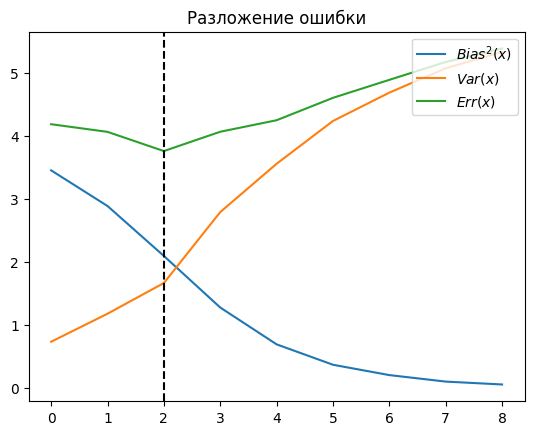

In [57]:
optimal_res = np.argmin(np.abs(np.array(bias_res) - np.array(var_res)))
plt.plot(bias_res, label='$Bias^2(x)$')
plt.plot(var_res, label='$Var(x)$')
plt.plot(err_res, label='$Err(x)$')
plt.axvline(optimal_res, linestyle='--', color='black')
plt.legend(loc='upper right')
plt.title('Разложение ошибки')
plt.show()

In [58]:
print(f'Оптимальная глубина деревьев: {optimal_res}')

Оптимальная глубина деревьев: 2
